# What is Pandas?

Think of the capabilities of [R](https://www.r-project.org/about.html), but using the Python programming language.

It is open source, fast, flexible, easy to learn and easy to use and has become popular in the field of data analysis.


# 1. Numpy

Pandas is a high level library built on top of [Numpy](http://www.numpy.org), a fundamental package for scientific computing with Python that enables powerful and fast array operations, amongst many other functions.

## Arrays
We already have native Python list and why do we still need numpy? Numpy is feature rich and much, much fast.

In [1]:
import numpy as np
from numpy.random import random

In [2]:
# get the same data in two data types
a = random(1000)
b = list(a)
print('a:', type(a), 'b:', type(b))

('a:', <type 'numpy.ndarray'>, 'b:', <type 'list'>)


In [3]:
%%timeit 
a.sum()

The slowest run took 155.34 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.11 µs per loop


In [4]:
%%timeit
b = list(a)
b_sum = 0
while b:
    b_sum += b.pop()
b_sum

1000 loops, best of 3: 252 µs per loop


For example, a common task is to convert a raster image to an numpy array so that it could be manipulated outside/bypassing a GIS, enabling more flexible and fast way to produce statistics. 

Imagine the following hypothetical array of values representing a 100 by 10 image (each pixel 30m x 30m resolution) of percentage tree cover, i.e. a pixel value of 0.43 suggest this pixel has 43% forest cover. The questions are:

- considering the definition of a forest pixel being more than 25% (FAO definition), what is the total size of forest in the image.
- what if the definition threshold has been reduced to 10%?

In [5]:
# hypothetical image
a = random(1000).reshape(100,10)

In [6]:
a

array([[  1.34748029e-01,   2.20076416e-01,   4.62448679e-01,
          1.66297662e-01,   9.42933201e-01,   3.93800523e-01,
          5.54558089e-01,   7.30492635e-01,   7.60544826e-01,
          2.83220235e-01],
       [  4.47385242e-02,   3.83542181e-01,   8.03691096e-01,
          1.70546795e-01,   1.51370786e-01,   3.03678362e-01,
          3.91529600e-01,   6.92368826e-01,   5.08903541e-01,
          5.86652949e-01],
       [  6.70467163e-01,   6.30742763e-01,   4.93885356e-01,
          2.24318069e-01,   1.90803343e-01,   8.12899775e-01,
          1.49677208e-01,   5.61973085e-01,   1.12551832e-01,
          4.78730925e-01],
       [  3.27441421e-01,   5.54487345e-01,   8.01628561e-01,
          3.86888428e-01,   1.21150708e-03,   1.42641585e-01,
          3.05720038e-01,   7.47067086e-01,   7.01463856e-01,
          6.94325940e-01],
       [  8.38721638e-01,   8.89633731e-01,   7.76620961e-01,
          9.12856184e-02,   8.11271434e-01,   1.82332279e-01,
          9.96792177e-01

In [7]:
a.size

1000

You can use a loop but in fact, it could be even simpler by using a boolen index itself.

In [8]:
# booleans arrays value treated: True -> 1, False -> 0
np.array([True, False, True]).sum()

2

In [9]:
a>0.25

array([[False, False,  True, False,  True,  True,  True,  True,  True,
         True],
       [False,  True,  True, False, False,  True,  True,  True,  True,
         True],
       [ True,  True,  True, False, False,  True, False,  True, False,
         True],
       [ True,  True,  True,  True, False, False,  True,  True,  True,
         True],
       [ True,  True,  True, False,  True, False,  True,  True,  True,
        False],
       [ True,  True, False, False,  True,  True,  True,  True,  True,
         True],
       [ True,  True, False,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True, False,  True,  True,
        False],
       [ True, False,  True,  True,  True, False,  True,  True,  True,
         True],
       [False,  True,  True, False,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True, False, False,
         True],
       [ True,  True,  True,  True,  True, 

In [10]:
# thus adding all values without loop..
(a>0.25).sum()

739

In [11]:
(a>0.25).sum() * 900 / 1000000.0

0.66510000000000002

By multiplying the the number of forest cell with cell size, the total area of forest can be easily calculated.

## Random module

Let's consider another example to illustrate the powerful `numpy.random` module: a simple walk starting from 0 with steps of 1 and -1 occurring with equal probability. Below we repeat 1000 steps for 5000 times, i.e., each row in the matrix represents a walk of 1000 steps and there will be 5000 walks.

![axis](./axis.jpg)

In [12]:
# shape of the array
nwalks = 5000
nsteps = 1000
# get random integers between 0 and 1
draws = np.random.randint(0, 2, size=(nwalks, nsteps)) 
# reclass values: 0->-1, 1->1,
steps = np.where(draws > 0, 1, -1)

In [14]:
draws

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 1, 1, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]])

In [15]:
steps

array([[-1, -1, -1, ...,  1,  1,  1],
       [-1, -1,  1, ...,  1, -1, -1],
       [ 1,  1,  1, ..., -1, -1, -1],
       ..., 
       [-1, -1, -1, ...,  1,  1, -1],
       [ 1, -1,  1, ..., -1, -1, -1],
       [-1, -1, -1, ..., -1,  1,  1]])

In [16]:
# cumulative sum along axis 1, for two-dimensional arrays. (left to right)
walks = steps.cumsum(1)

In [17]:
walks

array([[-1, -2, -3, ...,  6,  7,  8],
       [-1, -2, -1, ...,  8,  7,  6],
       [ 1,  2,  3, ..., -6, -7, -8],
       ..., 
       [-1, -2, -3, ..., -6, -5, -6],
       [ 1,  0,  1, ..., 40, 39, 38],
       [-1, -2, -3, ..., 62, 63, 64]])

The `np.ndarray.any` method returns *True* if any of its element evaluated to *True*. This can be used to determine those walks that have ended up 30 steps away from the starting point

In [18]:
walks.any?

In [19]:
(np.abs(walks)>30).any(1).sum()

3171

Out of 5000 walks, 3221 ended up having moved 30 steps away from the starting point

# 2. Pandas

Unlike numpy, Pandas contains higher-level data structures and manipulation tools designed to make data analysis fast and easy in Python, including: data I/O, cleaning, manipulation, visualisation and much more.

In [20]:
#!pip install pandas

In [21]:
%matplotlib inline
import pandas as pd

## Load data and export result

Pandas includes handy functions to handle common data formats. In this section, we will be using data on protected areas and biogeographical classifications in a CSV table. For each ecoregion, its higher classes of biome and realm are given, so are the size of ecoregions and how much of them are covered by protected areas.


In [22]:
a = pd.read_csv('ecoregion.csv')

Pandas dataframe is very similar to dataframe in R 

In [23]:
a.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%,NaN,All 4 Antarctic ecoregions were excluded from ...,NaN,NaN,NaN,NaN,NaN,NaN
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# unclean data
a.columns[7:]

Index([u'Unnamed: 7', u'Unnamed: 8', u'Unnamed: 9', u'Unnamed: 10',
       u'Unnamed: 11', u'Unnamed: 12', u'Unnamed: 13', u'Unnamed: 14'],
      dtype='object')

In [25]:
# get rid of columns of no/dirty data/artefacts
b = a.drop(a.columns[7:], axis=1)
b.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%


When you finish, you can export your dataframe to a csv file on disk

In [26]:
# don't save index as an additional column
b.to_csv('ecoregion_clean.csv', index=False)

In [27]:
c = pd.read_csv('ecoregion_clean.csv')
c.head(5)

,id,ecoregion_name,biome,realm,ecoregion_area,area_protected,percent_protected
0,60141,Monte Alegre varzeá,Tropical & Subtropical Moist Broadleaf Forests,Neotropics,66947.385010,15338.980790,22.9%
1,70104,Eastern Micronesia tropical moist forests,Tropical & Subtropical Moist Broadleaf Forests,Oceania,533.660211,40.425363,7.6%
2,30126,Northwestern Congolian lowland forests,Tropical & Subtropical Moist Broadleaf Forests,Afrotropics,435086.230900,91600.352920,21.1%
3,30908,Zambezian halophytics,Flooded Grasslands & Savannas,Afrotropics,30438.547710,6356.705778,20.9%
4,51307,Meseta Central matorral,Deserts & Xeric Shrublands,Nearctic,125544.338500,2546.763524,2.0%


## Explore data

If the field `percent_protected` really the division between `area_protected` and `ecoregion_area`? A good practice when you receive data is that you don't assume it is of good quality even it may appear so. Run a few interity checks, for example, does your data contain duplicate rows? Any missing values? Any obvious errors such as percentage value should never exceed 1?

In [28]:
# check data types
c.dtypes

id                     int64
ecoregion_name        object
biome                 object
realm                 object
ecoregion_area       float64
area_protected       float64
percent_protected     object
dtype: object

The field is a string object and it needs to be converted to a numeric value before any validation checks can be run

In [29]:
c['percent_protected_numeric'] = c.percent_protected.replace('%', '', regex=True).astype(float)/100

In [30]:
# calculate the percentage from raw areas
c['percent_protected_calculate'] = c.area_protected / c.ecoregion_area

In [31]:
# maximum value of percentage
c.percent_protected_calculate.max()

1.0

In [32]:
# maximum difference between percentage in the original data and one just caluclated
np.abs(c.percent_protected_numeric - c.percent_protected_calculate).max()

0.00049998846934889984

Check duplicates

In [34]:
# check there is no duplicates
# unique value of ecoregion name
c.ecoregion_name.unique().size == c.index.size

True

In [35]:
# Summary statistics
c.describe()

,id,ecoregion_area,area_protected,percent_protected_numeric,percent_protected_calculate
count,821.000000,8.210000e+02,821.000000,821.000000,821.000000
mean,52465.563946,1.610285e+05,23043.785198,0.207116,0.207114
std,21894.001795,3.287230e+05,44414.061076,0.217698,0.217688
min,10101.000000,6.082918e+00,0.000000,0.000000,0.000000
25%,40109.000000,1.615546e+04,1473.016376,0.053000,0.052608
50%,51303.000000,6.251634e+04,7409.636151,0.128000,0.128252
75%,70116.000000,1.845928e+05,23922.092960,0.284000,0.283930
max,81333.000000,4.650158e+06,342909.931800,1.000000,1.000000


Often it may be of interest to select and focus on a subset of the dataframe, group a number of rows based on common values in a field (pivot table), find low/high and quantities, and to quickly make a graph or map to visually explore their relationships. 

In [36]:
# how many ecoregions have less than 5% protection
(c.percent_protected_calculate < 0.05).sum()

194

In [37]:
# what are top ecoregions with the lowest protection
c.sort_values?

In [38]:
print(c.sort_values(by='percent_protected_calculate', ascending=False).tail(5))

        id                                    ecoregion_name  \
804  31304                           Eritrean coastal desert   
803  80420               Eastern Anatolian deciduous forests   
802  31321            Southwestern Arabian montane woodlands   
801  31319                    Somali montane xeric woodlands   
820  80515  Northern Anatolian conifer and deciduous forests   

                                   biome        realm  ecoregion_area  \
804           Deserts & Xeric Shrublands  Afrotropics     4604.696113   
803  Temperate Broadleaf & Mixed Forests   Palearctic    81747.971930   
802           Deserts & Xeric Shrublands  Afrotropics    87101.536660   
801           Deserts & Xeric Shrublands  Afrotropics    62774.470050   
820            Temperate Conifer Forests   Palearctic   101519.257900   

     area_protected percent_protected  percent_protected_numeric  \
804             0.0              0.0%                        0.0   
803             0.0              0.0%   

In [39]:
# how does the result look for biomes
c.groupby('biome').ecoregion_area.sum()

biome
Boreal Forests/Taiga                                        1.507795e+07
Deserts & Xeric Shrublands                                  2.798464e+07
Flooded Grasslands & Savannas                               1.096130e+06
Mangroves                                                   3.485189e+05
Mediterranean Forests, Woodlands & Scrub                    3.227266e+06
Montane Grasslands & Shrublands                             5.203411e+06
Temperate Broadleaf & Mixed Forests                         1.283569e+07
Temperate Conifer Forests                                   4.087094e+06
Temperate Grasslands, Savannas & Shrublands                 1.010408e+07
Tropical & Subtropical Coniferous Forests                   7.126166e+05
Tropical & Subtropical Dry Broadleaf Forests                3.025997e+06
Tropical & Subtropical Grasslands, Savannas & Shrublands    2.029542e+07
Tropical & Subtropical Moist Broadleaf Forests              1.989415e+07
Tundra                                       

In [41]:
# use ? to look up what this function does
d = c.groupby('biome').aggregate({'ecoregion_area':sum, 'area_protected':sum})

In [42]:
d

,ecoregion_area,area_protected
biome,,
Boreal Forests/Taiga,1.507795e+07,1.431270e+06
Deserts & Xeric Shrublands,2.798464e+07,2.708582e+06
Flooded Grasslands & Savannas,1.096130e+06,3.158410e+05
Mangroves,3.485189e+05,1.021528e+05
"Mediterranean Forests, Woodlands & Scrub",3.227266e+06,5.116118e+05
Montane Grasslands & Shrublands,5.203411e+06,1.414551e+06
Temperate Broadleaf & Mixed Forests,1.283569e+07,1.571072e+06
Temperate Conifer Forests,4.087094e+06,6.944194e+05
"Temperate Grasslands, Savannas & Shrublands",1.010408e+07,4.652546e+05


In [43]:
# create a new field in the dataframe to hold the percentage protected value
d['percent'] = d.area_protected/d.ecoregion_area

In [44]:
d.sort_values('percent', ascending=True)

,ecoregion_area,area_protected,percent
biome,,,
"Temperate Grasslands, Savannas & Shrublands",1.010408e+07,4.652546e+05,0.046046
Boreal Forests/Taiga,1.507795e+07,1.431270e+06,0.094925
Deserts & Xeric Shrublands,2.798464e+07,2.708582e+06,0.096788
Tropical & Subtropical Dry Broadleaf Forests,3.025997e+06,3.036879e+05,0.100360
Tropical & Subtropical Coniferous Forests,7.126166e+05,8.708982e+04,0.122211
Temperate Broadleaf & Mixed Forests,1.283569e+07,1.571072e+06,0.122399
"Tropical & Subtropical Grasslands, Savannas & Shrublands",2.029542e+07,3.079894e+06,0.151753
"Mediterranean Forests, Woodlands & Scrub",3.227266e+06,5.116118e+05,0.158528
Temperate Conifer Forests,4.087094e+06,6.944194e+05,0.169905


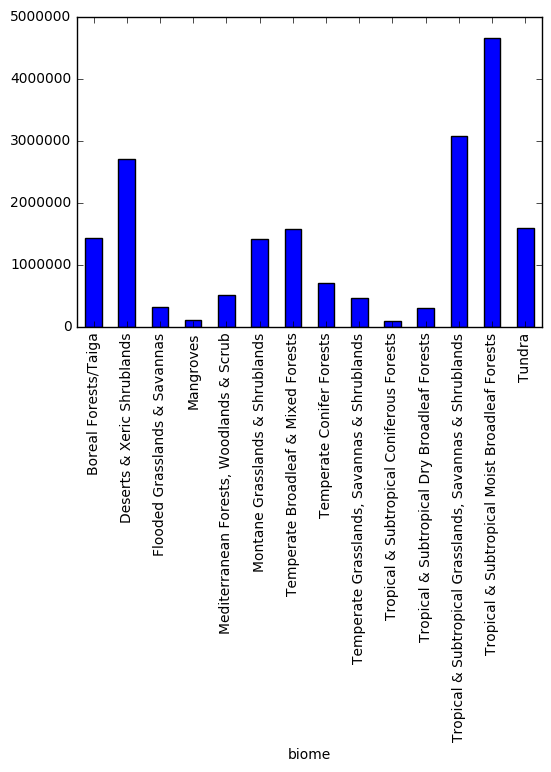

In [45]:
# how does the distribution of protected areas look like
d.area_protected.plot.bar()

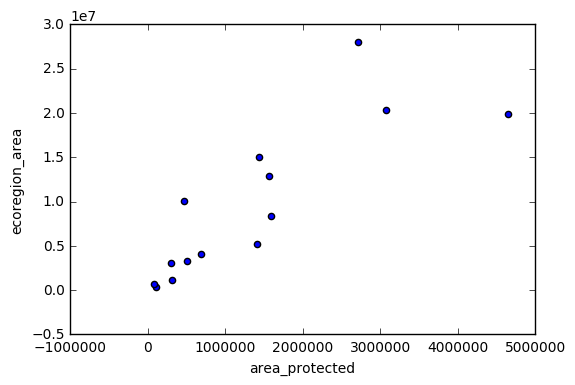

In [46]:
d.plot.scatter('area_protected', 'ecoregion_area')

More pandas dataframe plotting functions can be found [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)

# Exercise

## Random walks using a different distribution

Instead of either 1 or -1, use a normal distribution of steps. HINT: 
```python
steps = np.random.normal(mean, sd, size)
```

In [ ]:
## np.random.normal(0, 1, (5000, 1000))

## Biogeographic realms protected

Instead of using ecoregion and biome, which is the biome with the least protection in terms of protected area coverage.